<h2>Calcolo della massima portata in un nodo</h2>
(E' necessario aver svolto le simulazioni per tutti i tempi di pioggia)

Si carica la libreria che consente di conoscere e scegliere la directory di lavoro

In [1]:
import os
os.getcwd()

'C:\\Users\\anzo5\\Desktop\\fognatura\\nodes'

Si interroga ora la lista dei file presenti nella nuova directory di lavoro. Se corretta sono presenti le cartelle relative alle simulazioni per ogni tempo di pioggia. (5mins, 10mins,...)

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'csv',
 'desktop.ini',
 'n01_qmax.ipynb',
 'n02_qmax.ipynb',
 'n03_qmax.ipynb',
 'n04_qmax.ipynb',
 'n05_qmax.ipynb',
 'n10_qmax.ipynb',
 'n11_qmax.ipynb',
 'n12_qmax.ipynb',
 'n13_qmax.ipynb',
 'n14_qmax.ipynb',
 'n15_qmax.ipynb',
 'n16_qmax.ipynb',
 'n17_qmax.ipynb',
 'n18_qmax.ipynb',
 'n19_qmax.ipynb',
 'n20_qmax.ipynb',
 'n21_qmax.ipynb',
 'n22_qmax.ipynb',
 'n23_qmax.ipynb',
 'n24_qmax.ipynb',
 'n26_qmax.ipynb',
 'n29_qmax.ipynb']

In [3]:
os.chdir('csv')
os.listdir()

['.~lock.n23.csv#',
 'n00.csv',
 'n01.csv',
 'n02.csv',
 'n03.csv',
 'n04.csv',
 'n05.csv',
 'n06.csv',
 'n07.csv',
 'n08.csv',
 'n09.csv',
 'n10.csv',
 'n11.csv',
 'n12.csv',
 'n13.csv',
 'n14.csv',
 'n15.csv',
 'n16.csv',
 'n17.csv',
 'n18.csv',
 'n19.csv',
 'n20.csv',
 'n21.csv',
 'n22.csv',
 'n23.csv',
 'n24.csv',
 'n25.csv',
 'n26.csv',
 'n27.csv',
 'n28.csv',
 'n29.csv']

Finalmente si importa la libreria "pandas"

In [4]:
from pandas import *
import pandas as pd
import datetime as datetime


Si legge il file csv del nodo contenente le portate nel tempo per i diversi tempi di pioggia, usando il comando di panda <code>read_csv</code>

In [6]:
pd.options.display.max_rows = 20
node = pd.read_csv('n23.csv')
map(datetime, node['time'])
node = node.set_index('time')
node

,5min,10min,15min,20min,25min
time,,,,,
00:00:30,0.003221,0.001400,0.000841,0.000578,0.000428
00:01:00,0.006873,0.002956,0.001776,0.001220,0.000903
00:01:30,0.015431,0.006216,0.003763,0.002663,0.002024
00:02:00,0.028878,0.011349,0.006449,0.004356,0.003269
00:02:30,0.047347,0.018958,0.010822,0.007146,0.005181
00:03:00,0.070841,0.029376,0.016924,0.011275,0.008166
00:03:30,0.095244,0.041477,0.024444,0.016475,0.012014
00:04:00,0.120051,0.055088,0.033382,0.022909,0.016902
00:04:30,0.141643,0.068257,0.042584,0.029815,0.022317


Finalmente visualizziamo i dati con matplotlib. Il secondo comando, preceduto da "%" consente di visualizzare automaticamente sullo schermo il risultato grafico. 

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 

Si visualizzano le curve di portata rispetto all'andamento nel tempo per un controllo ulteriore

In [8]:
all=node[['5min','10min', '15min', '20min', '25min']]

[]

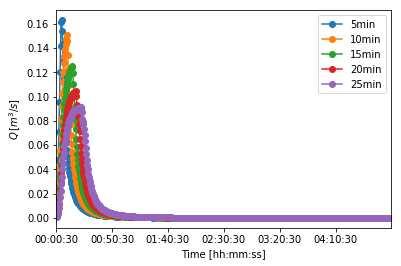

In [9]:
ax = all.plot(style="-o")
ax.set_xlabel('Time [hh:mm:ss]')
ax.set_ylabel(r'$Q\,\left[m^3/s\right]$')
ax.plot()

Si valuta il valore massimo di portata tra i massimi ottenuti per tempi diversi di pioggia e il relativo tempo critico

In [10]:
n_t1 = node['5min']
n_t2 = node['10min']
n_t3 = node['15min']
n_t4 = node['20min']
n_t5 = node['25min']

In [11]:
maxValues = [n_t1.max(), n_t2.max(), n_t3.max(), n_t4.max(), n_t5.max()]
maxValues

[0.162918, 0.151029, 0.125172, 0.104518, 0.091047]

Il valore massimo tra i tempi è $Q_{max}$ e vale

In [12]:
maxValue = max(maxValues)
maxValue

0.162918

cioè, in litri

In [15]:
maxValue * 1000

162.918

La sua posizione nel file dei massimi è:

In [16]:
maxValues.index(maxValue)

0

cioè è causata dalla precipitazione di **5min**.

Ora ci proponiamo di trovare il tempo in cui il massimo si realizza. Per fare questo dobbiamo considerare il primo dataFrame.

In [17]:
mask=(n_t1==n_t1.max())

In [18]:
n_t1[mask]

time
00:05:30    0.162918
Name: 5min, dtype: float64

Il tempo di pioggia critico risulta:

In [19]:
n_t1[mask].index

Index(['00:05:30'], dtype='object', name='time')

---